In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [115]:
# Load the dataset
file_path = 'C:\\Users\\ASUS\\Desktop\\crude-oil-price.csv'  # Replace with the path to your dataset
df = pd.read_csv(file_path)

In [116]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [117]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                           price  percentChange  change
date                                                   
1983-03-30 00:00:00+00:00  29.27            NaN     NaN
1983-04-04 00:00:00+00:00  30.63          4.646    1.36
1983-05-02 00:00:00+00:00  30.25         -1.241   -0.38
1983-06-01 00:00:00+00:00  31.38          3.736    1.13
1983-07-01 00:00:00+00:00  32.00          1.976    0.62


In [118]:
# Basic statistics
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
            price  percentChange      change
count  496.000000     495.000000  495.000000
mean    46.150331       0.741711    0.103678
std     29.000639      10.492506    4.961665
min     10.420000     -54.245000  -32.830000
25%     20.420000      -5.252000   -1.710000
50%     33.315000       0.929000    0.270000
75%     68.805000       6.344500    2.395000
max    140.000000      88.376000   16.650000


In [119]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
price            0
percentChange    1
change           1
dtype: int64


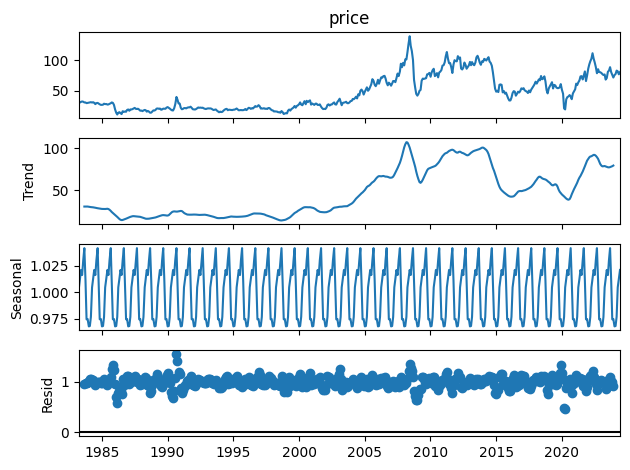

In [120]:
# Seasonal decomposition
result = seasonal_decompose(df['price'], model='multiplicative', period=12)
result.plot()
plt.show()


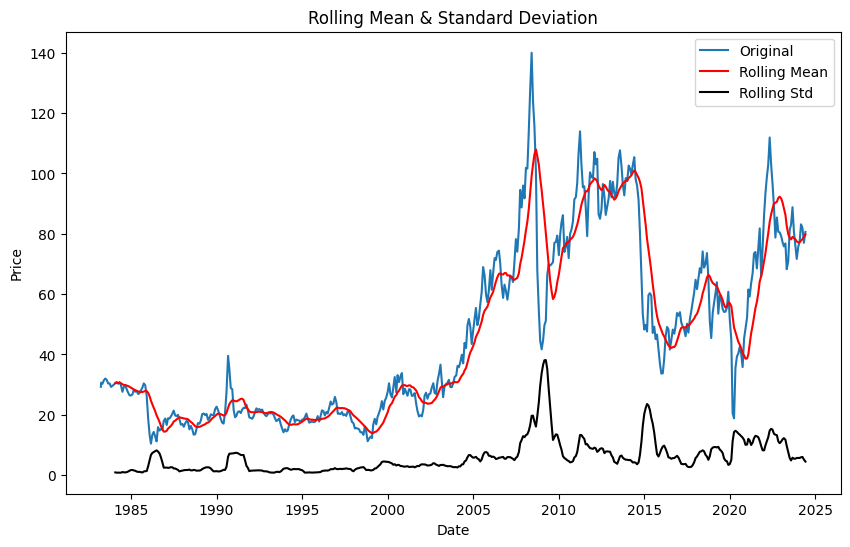

In [121]:
# Rolling statistics
rolling_mean = df['price'].rolling(window=12).mean()
rolling_std = df['price'].rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(df['price'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()


In [122]:
# Augmented Dickey-Fuller test
adf_test = adfuller(df['price'])
print(f"\nADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -2.22479722171217
p-value: 0.19736889544092917
Critical Values:
   1%: -3.4436568932270095
   5%: -2.8674084917497074
   10%: -2.5698956806372832


In [123]:
# Auto SARIMA to find the best model
auto_model = auto_arima(df['price'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2970.148, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2993.472, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2974.110, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2974.569, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2991.689, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2970.321, Time=0.93 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2970.599, Time=1.03 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2972.276, Time=2.85 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2971.699, Time=2.27 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2970.160, Time=0.33 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2969.842, Time=1.89 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=2977.597, Time=0.76 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=2977.643, Time=0.60 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=2973.815, Time=1.30 sec
 ARIMA(2,1,3)(0,0,2

In [133]:
# Fitting the SARIMAX model with parameters found by auto_arima
model = SARIMAX(df['price'], order=auto_model.order, seasonal_order=auto_model.seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA p

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  496
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1477.151
Date:                            Wed, 26 Jun 2024   AIC                           2968.302
Time:                                    17:26:56   BIC                           2997.734
Sample:                                         0   HQIC                          2979.856
                                            - 496                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4266      0.100     14.226      0.000       1.230       1.623
ar.L2         -0.6068      0.125   

In [125]:
# Forecasting
forecast_steps = 12  # Number of steps to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [131]:
# Confidence intervals
forecast_ci = forecast.conf_int()

# Creating forecast index starting from the last date in the dataset
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='ME')[1:]

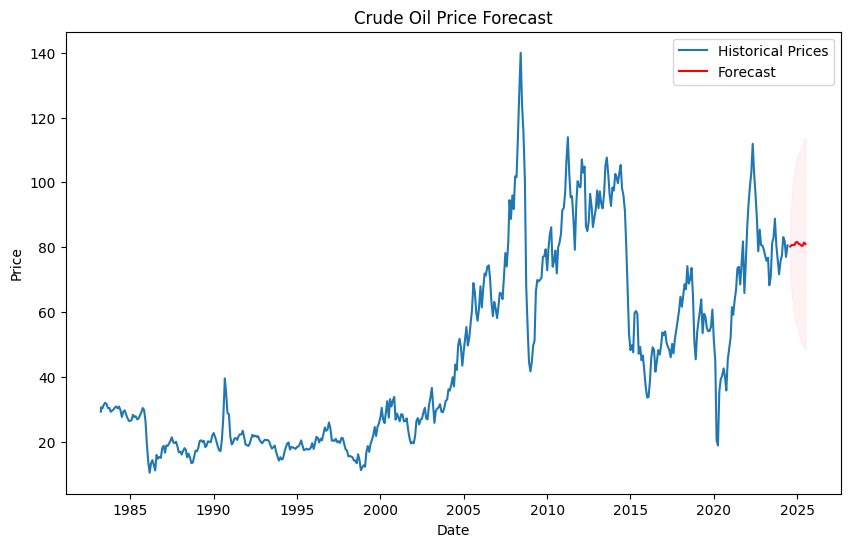

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(df['price'], label='Historical Prices')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Crude Oil Price Forecast')
plt.legend()
plt.show()

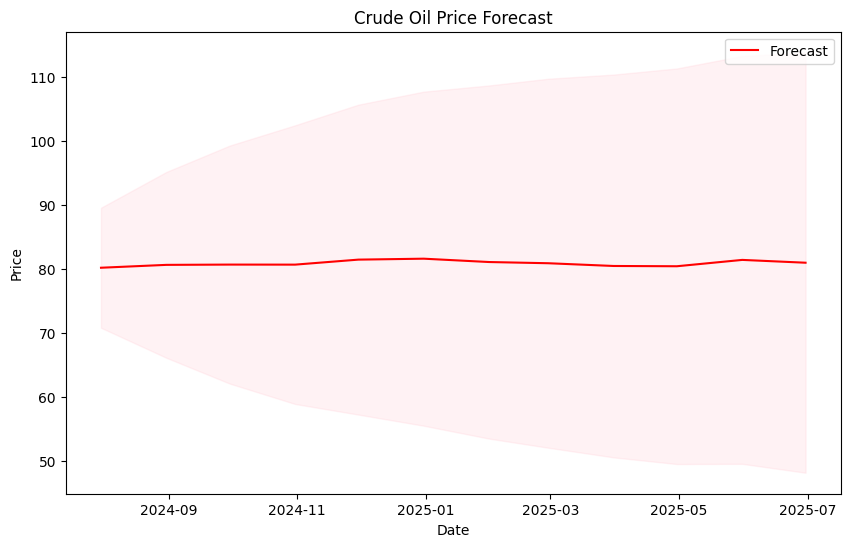

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Crude Oil Price Forecast')
plt.legend()
plt.show()

In [128]:
# Volatility analysis (annualized standard deviation)
df['returns'] = df['price'].pct_change()
df['volatility'] = df['returns'].rolling(window=252).std() * np.sqrt(252)

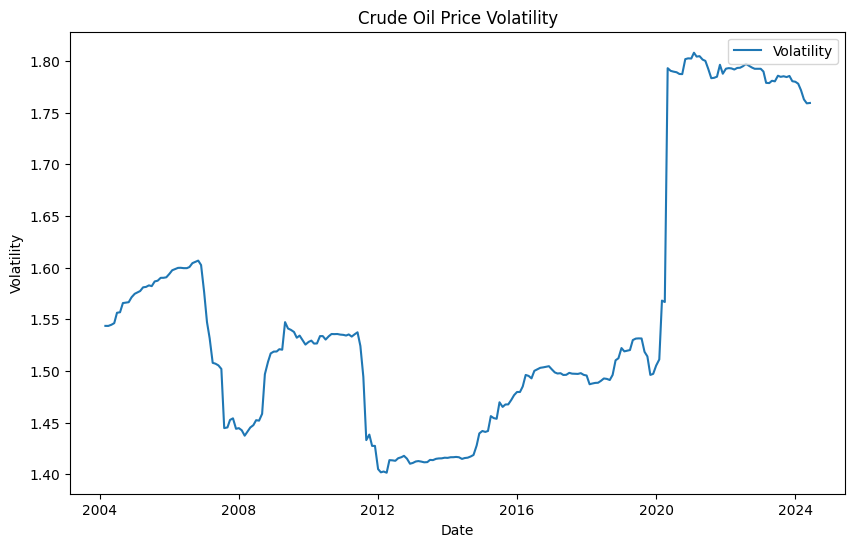

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(df['volatility'], label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Crude Oil Price Volatility')
plt.legend()
plt.show()